In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Trans_casos_tots.csv")

In [3]:
df.head()

,Unnamed: 0,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
0,0,0,0x717403,Sold,5000,0xa9bfa9,0x717403,0.30,67.0,2017-08-03
1,1,1,0x717403,Bid,5000,0x717403,NaN,0.30,80.0,2017-07-05
2,2,2,0xa0a59c,Bid,5000,0xa0a59c,NaN,0.30,81.0,2017-07-04
3,3,3,0x717403,Bid Withdrawn,5000,0x717403,NaN,0.06,16.0,2017-07-04
4,4,4,0x717403,Bid,5000,0x717403,NaN,0.06,15.0,2017-06-26


In [4]:
df.describe()

,Unnamed: 0,idTransaction,idCryptoPunk,AmountETH,AmountDollar
count,161232.000000,161232.000000,161232.000000,161232.000000,1.612320e+05
mean,18980.486033,18980.486033,5317.112161,69.156082,1.416342e+05
std,12880.185192,12880.185192,2779.632619,3748.361429,3.118849e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8064.000000,8064.000000,2979.000000,0.020000,1.100000e+01
50%,17638.000000,17638.000000,5395.000000,6.660000,4.361000e+03
75%,27719.000000,27719.000000,7703.000000,34.000000,7.446900e+04
max,52761.000000,52761.000000,9999.000000,1000000.000000,5.812800e+08


In [5]:
# Filter only actual sales

compras = df[df["TypeTransaction"] == "Sold"]

compras.sort_values(by="AmountDollar", inplace=True)

<ipython-input-5-53fb04b9f668>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras.sort_values(by="AmountDollar", inplace=True)


In [6]:
# Get the frequency of times sold

freq = compras["idCryptoPunk"].value_counts()

freq_good = freq.value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

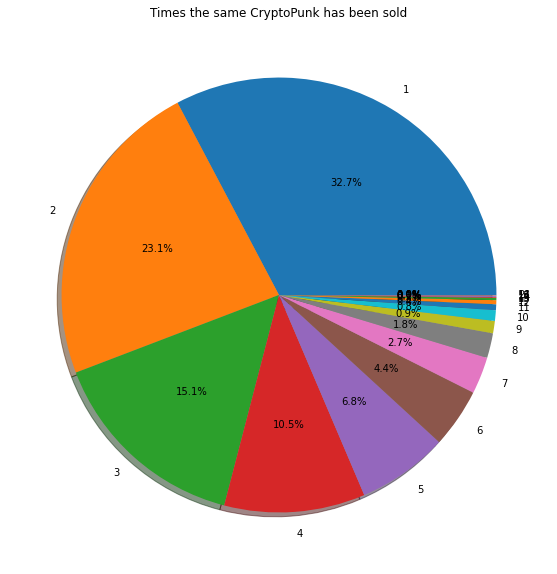

In [7]:
# Figure 15: Pie chart of times a CrytpoPunk has been sold

plt.figure(figsize=(10, 10)) 

plt.pie(freq_good, labels=freq_good.index, autopct='%1.1f%%', shadow=True)
plt.title("Times the same CryptoPunk has been sold")

plt.show

In [8]:
# Import new .csv file with all transactions and their respective Punks

df = pd.read_csv("Trans+Punks_casos_tots.csv")

# Filter only actual sales

sales = df[df["TypeTransaction"] == "Sold"]

<function matplotlib.pyplot.show(close=None, block=None)>

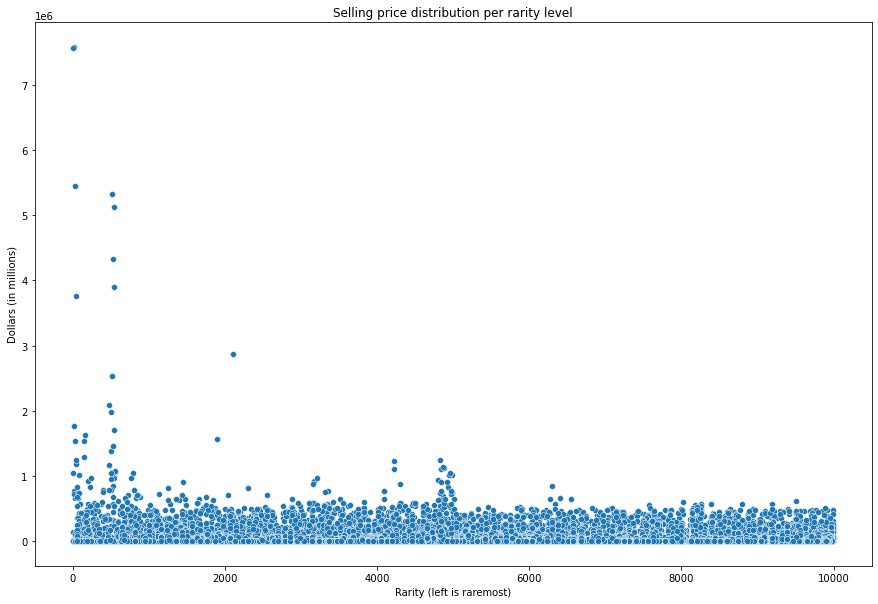

In [9]:
# Figure 3: Price vs rarity relationship

plt.figure(figsize=(15, 10)) 

sns.scatterplot(x = "rarity_rank", y = "AmountDollar", data=sales)
plt.title("Selling price distribution per rarity level")
plt.ylabel("Dollars (in millions)")
plt.xlabel("Rarity (left is raremost)")

plt.show